In [1]:
# Run the code cell.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/air-quality/AirQualityUCI.csv'
df = pd.read_csv(csv_file, sep=';')

# Dropping the 'Unnamed: 15' & 'Unnamed: 16' columns.
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1) 

# Dropping the null values.
df = df.dropna()

# Creating a Pandas series containing 'datetime' objects.
dt_series = pd.Series(data = [item.split("/")[2] + "-" + item.split("/")[1] + "-" + item.split("/")[0] for item in df['Date']], index=df.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in df['Time']], index=df.index)
dt_series = pd.to_datetime(dt_series)

# Remove the Date & Time columns from the DataFrame and insert the 'dt_series' in it.
df = df.drop(columns=['Date', 'Time'], axis=1)
df.insert(loc=0, column='DateTime', value=dt_series)

# Get the Pandas series containing the year values as integers.
year_series = dt_series.dt.year

# Get the Pandas series containing the month values as integers.
month_series = dt_series.dt.month

# Get the Pandas series containing the day values as integers.
day_series = dt_series.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
day_name_series = dt_series.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day Name'] = day_name_series

# Sort the DataFrame by the 'DateTime' values in the ascending order. Also, display the first 10 rows of the DataFrame.
df = df.sort_values(by='DateTime')

# Create a function to replace the commas with periods in a Pandas series.
def comma_to_period(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=df.index)
    return new_series

# Apply the 'comma_to_period()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    df[col] = comma_to_period(df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
df = df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

# Create a new DataFrame containing records for the years 2004 and 2005.
aq_2004_df = df[df['Year'] == 2004]
aq_2005_df = df[df['Year'] == 2005]

# Replace the -200 value with the median values for each column having indices between 1 and -4 (excluding -4) for the 2004 year DataFrame.
for col in aq_2004_df.columns[1:-4]:
  median = aq_2004_df.loc[aq_2004_df[col] != -200, col].median() # Get the median value for each column after excluding -200.
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)

# Repeat the same exercise for the 2005 year DataFrame.
for col in aq_2005_df.columns[1:-4]:
  median = aq_2005_df.loc[aq_2005_df[col] != -200, col].median()
  aq_2005_df[col] = aq_2005_df[col].replace(to_replace=-200, value=median)

# Get the columns in the original DataFrame.
df.columns

Index(['DateTime', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Year', 'Month', 'Day',
       'Day Name'],
      dtype='object')

In [2]:
df.head()

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday


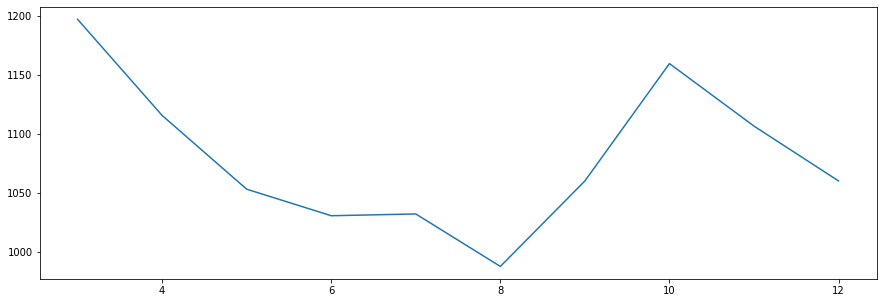

In [3]:
group_2004_month = aq_2004_df.groupby(by='Month', as_index = False)
group_2005_month = aq_2005_df.groupby(by='Month', as_index = False)
plt.figure(figsize=(15, 5))
plt.plot(group_2004_month.median()['Month'], group_2004_month.median()['PT08.S1(CO)'])
plt.show()

In [4]:
common_months = []
common_month_names = []
for month in aq_2005_df['Month'].unique():
 if month in aq_2004_df['Month'].unique():
  common_months.append(month) 

for month_name in aq_2005_df['DateTime'].dt.month_name().unique():
 if month_name in aq_2004_df['DateTime'].dt.month_name().unique():
  common_month_names.append(month_name)
print(common_months)
print(common_month_names)

[3, 4]
['March', 'April']


In [5]:
group_2004_common_months = group_2004_month.median()[group_2004_month.median()['Month'] < 5]
group_2004_common_months

,Month,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Day
0,3,1197.0,8.65,926.0,966.5,1543.0,992.5,14.05,52.2,0.79205,2004.0,21.0
1,4,1115.5,8.80,931.0,882.0,1555.0,949.0,16.30,50.1,0.92410,2004.0,15.5


In [6]:
group_2005_common_months = group_2005_month.median()[group_2005_month.median()['Month'] > 2]
group_2005_common_months

,Month,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Day
2,3,1126.0,6.6,841.0,684.5,1217.0,1039.5,13.5,51.8,0.7834,2005.0,16.0
3,4,925.0,3.3,669.0,906.0,936.0,556.0,15.1,35.6,0.5977,2005.0,2.0


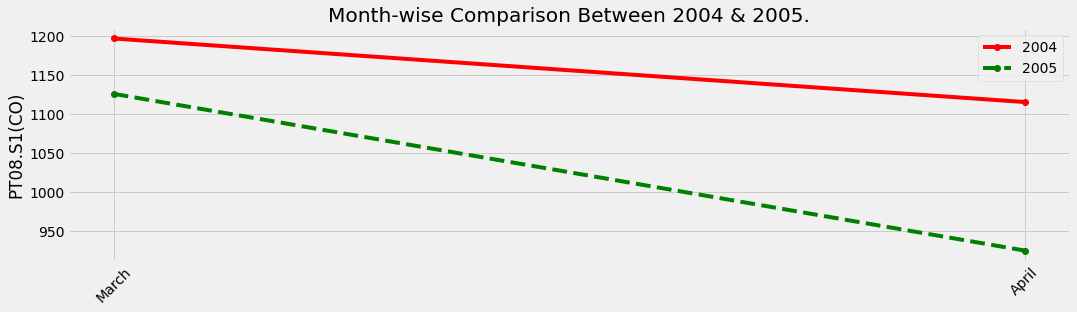

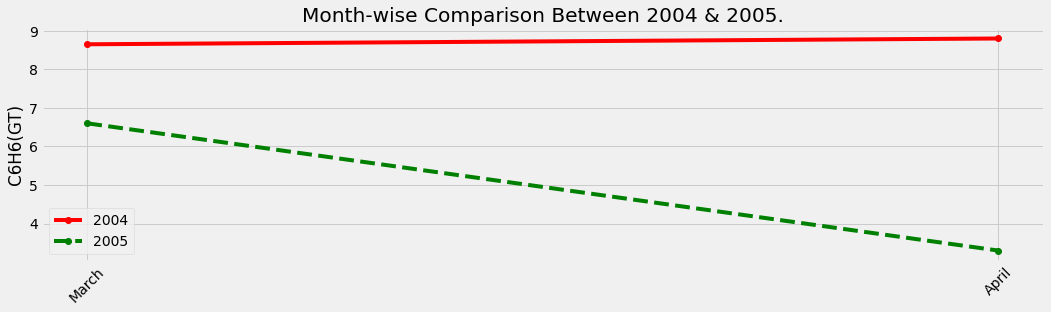

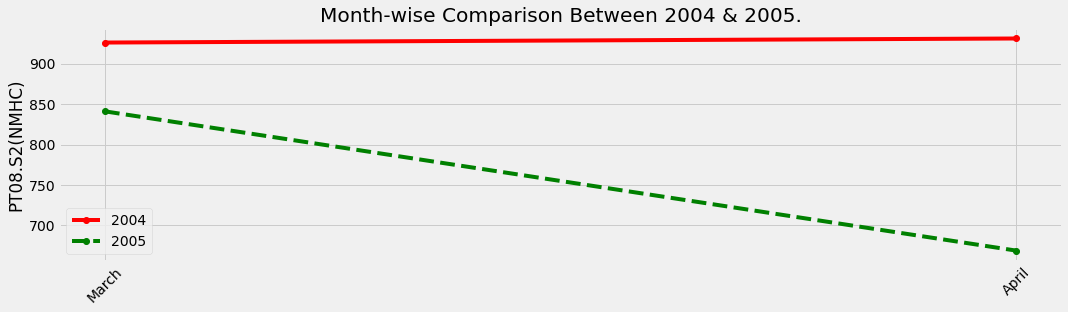

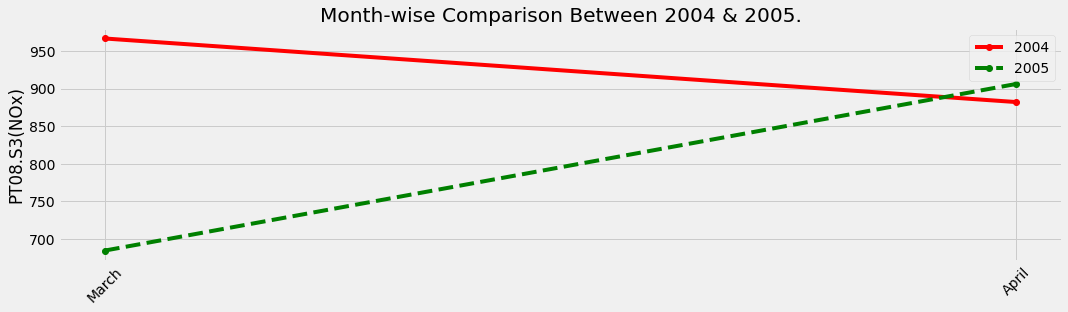

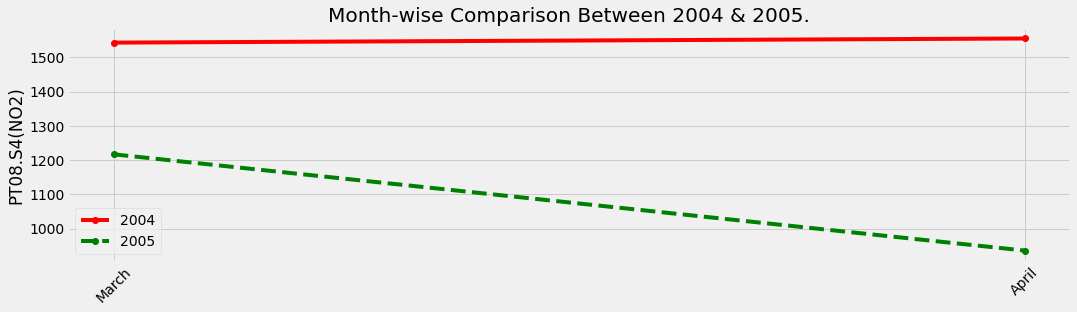

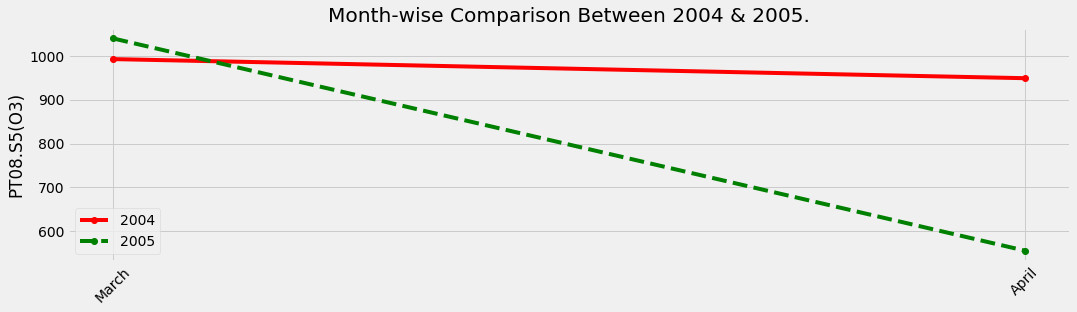

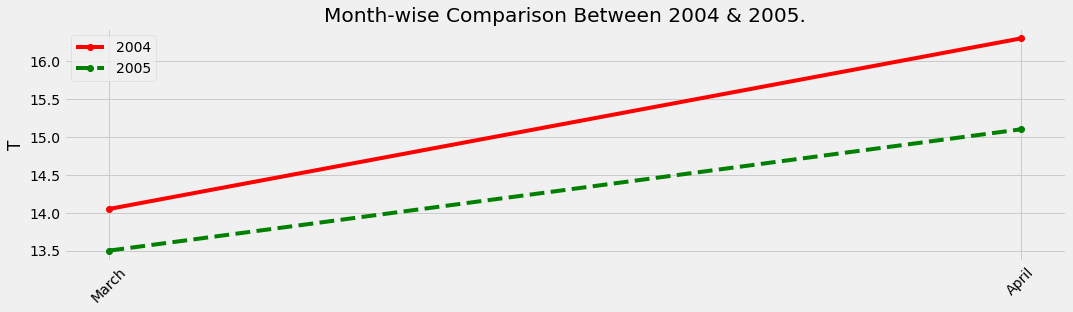

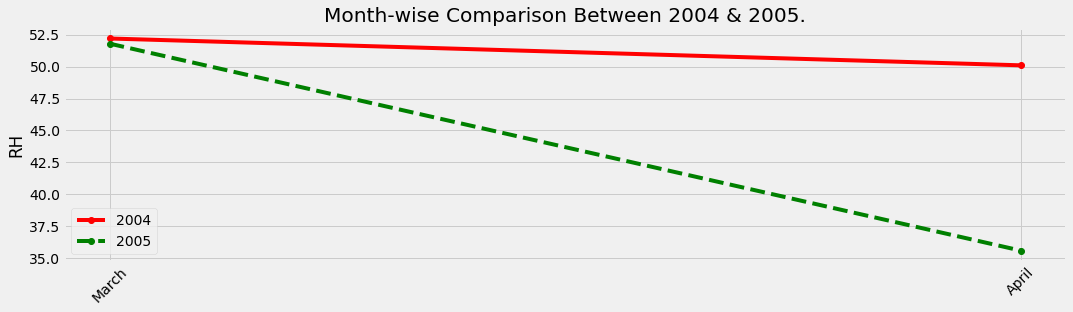

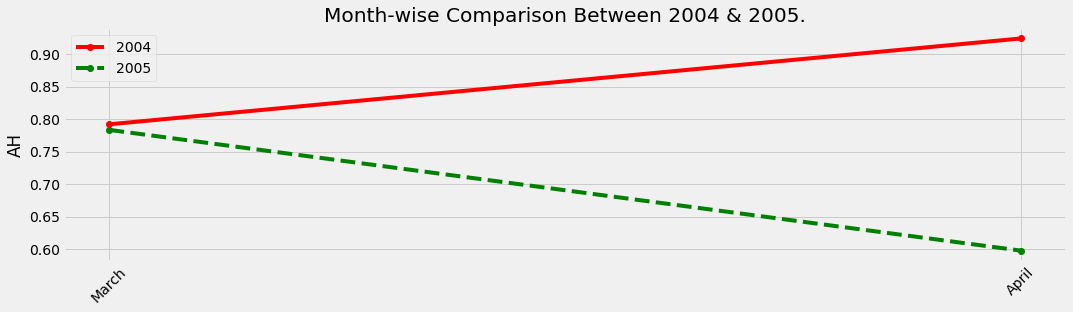

In [7]:
plt.style.use('fivethirtyeight')
for col in group_2004_common_months.columns[1:-2]:
  plt.figure(figsize=(16, 4))
  plt.title("Month-wise Comparison Between 2004 & 2005.")
  plt.plot(common_months, group_2004_common_months[col], 'r-o', label='2004')
  plt.plot(common_months, group_2005_common_months[col], 'g--o', label='2005')
  plt.ylabel(col)
  plt.xticks(ticks=group_2004_common_months['Month'],labels=common_month_names, rotation=45)
  plt.legend()
  plt.grid(True)
  plt.show()

In [8]:
df = pd.concat([aq_2004_df, aq_2005_df])
df.head()

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday


In [9]:
def line_plot(style, width, height, x_series, y_series, year, colour):
  plt.style.use(style)
  plt.figure(figsize=(width, height))
  plt.title(f"\nTime-series Plot for {y_series.name} in {year}")
  plt.plot(x_series, y_series, colour)
  plt.xticks(rotation=45) # You choose any value between 0 and 360 degrees.
  plt.grid(True)
  plt.show()

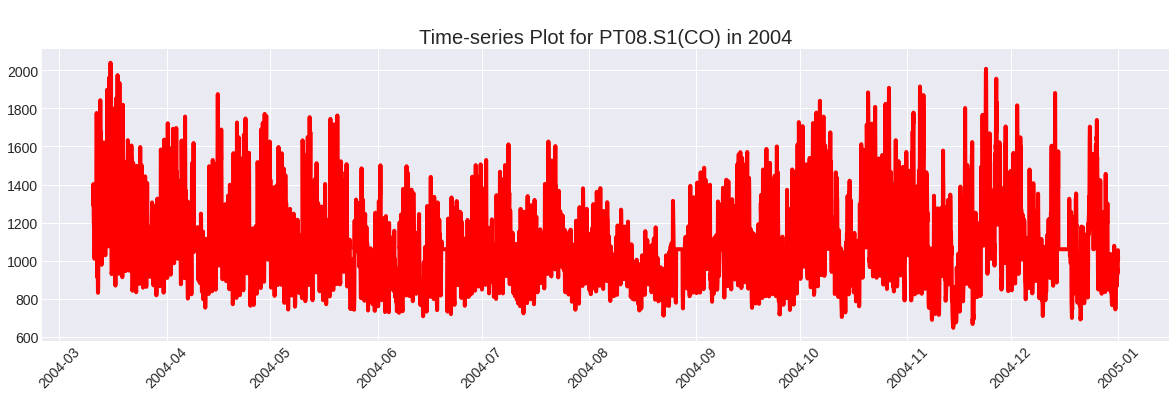

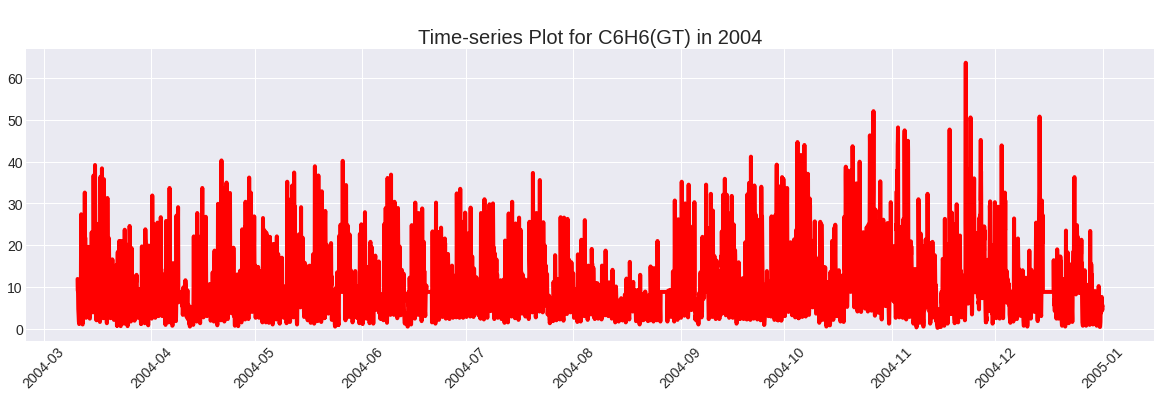

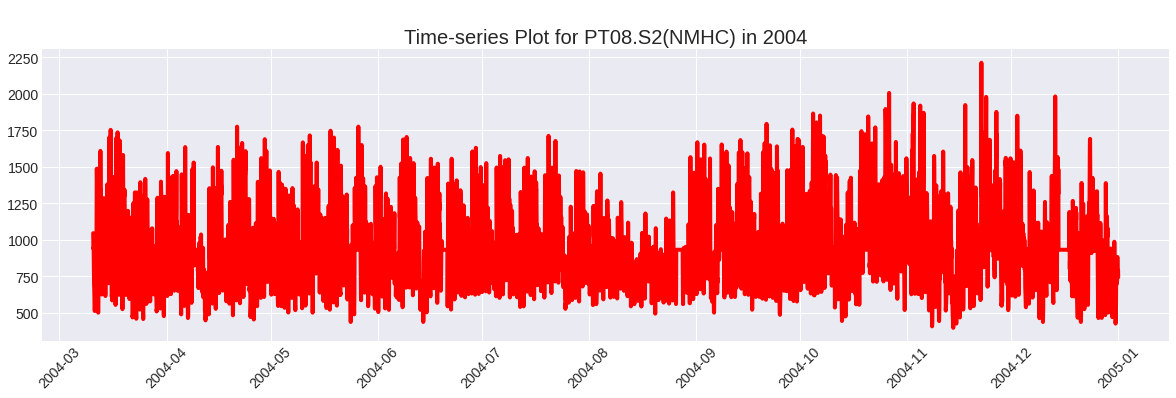

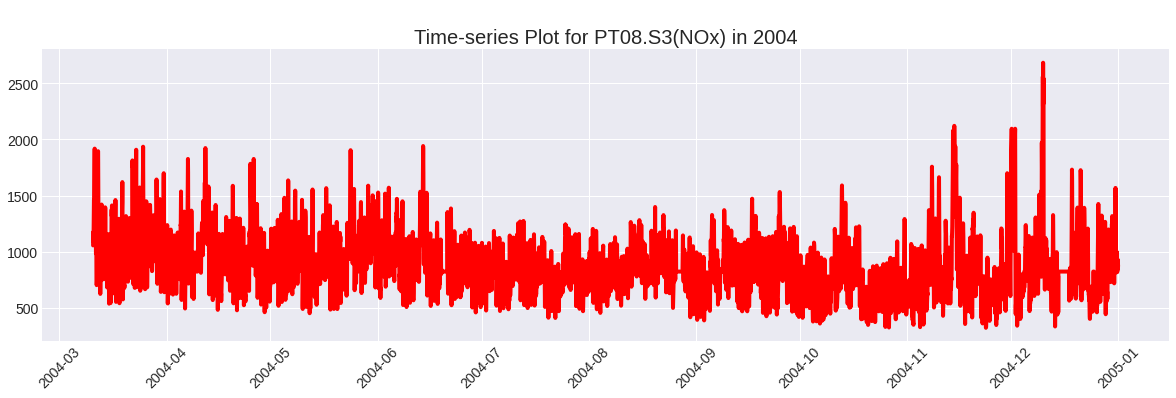

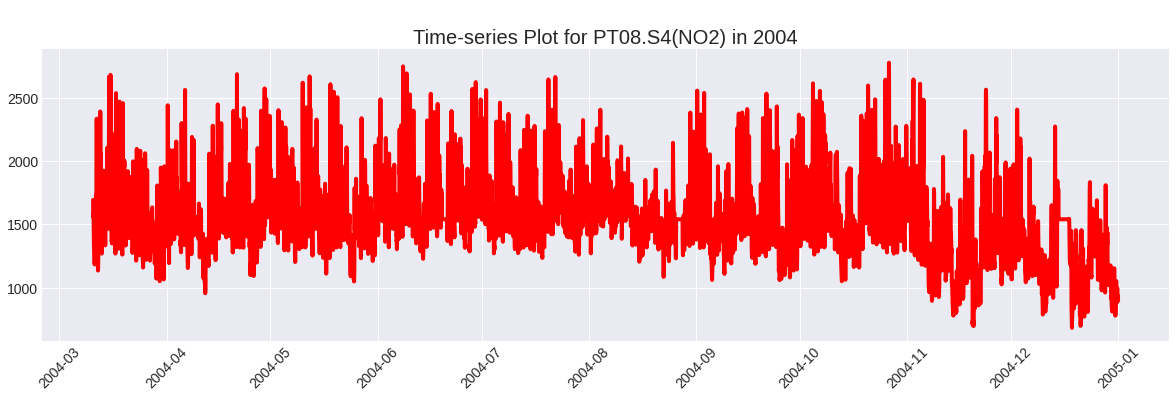

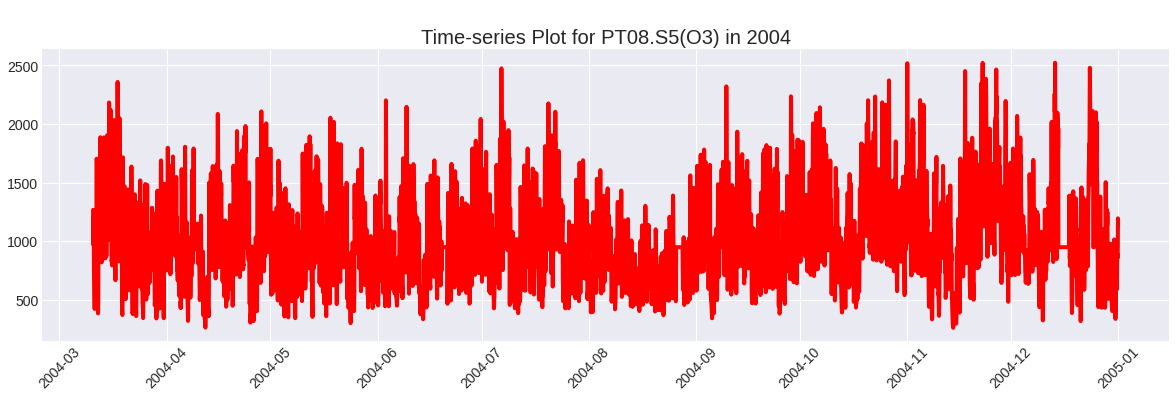

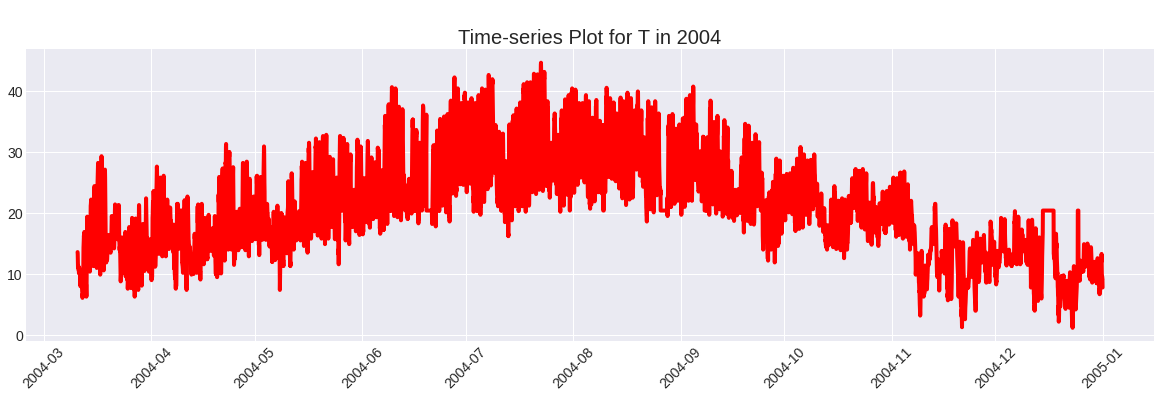

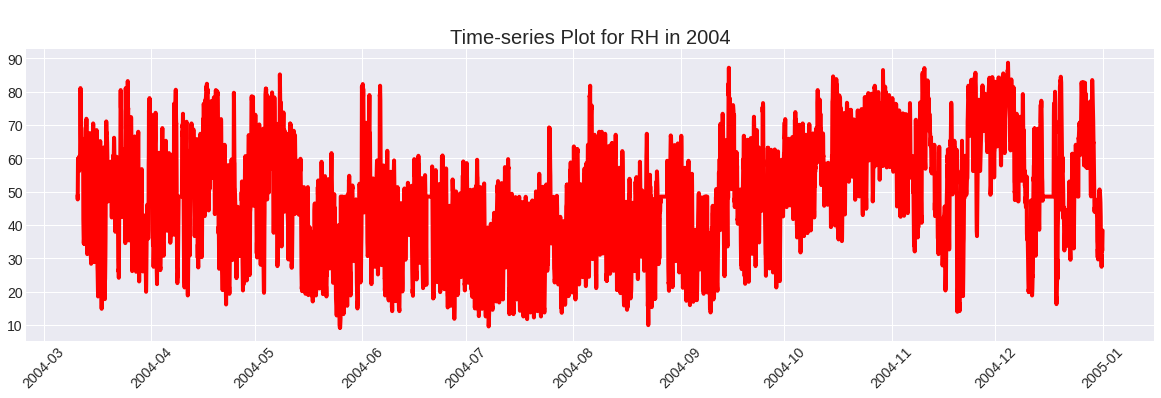

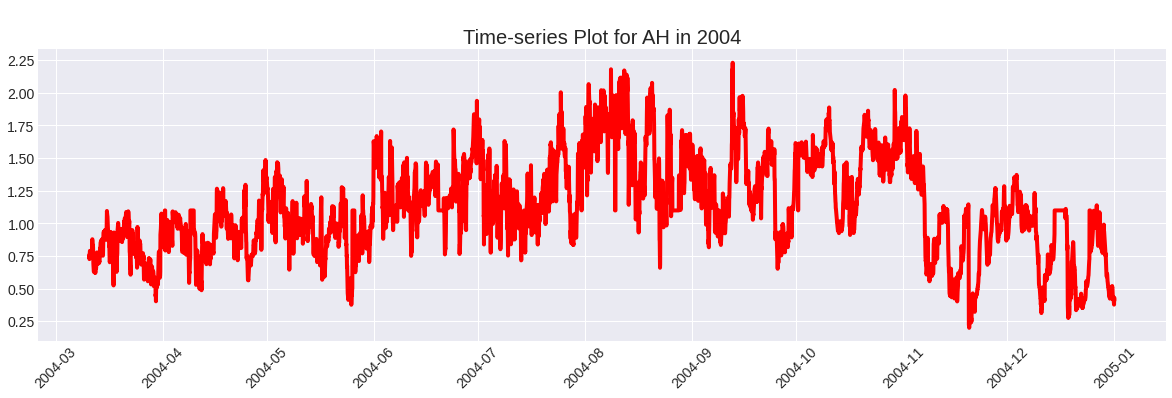

In [10]:
for col in aq_2004_df.columns[1:-4]:
 line_plot('seaborn-dark', 18, 5, aq_2004_df['DateTime'], aq_2004_df[col],2004, 'r')

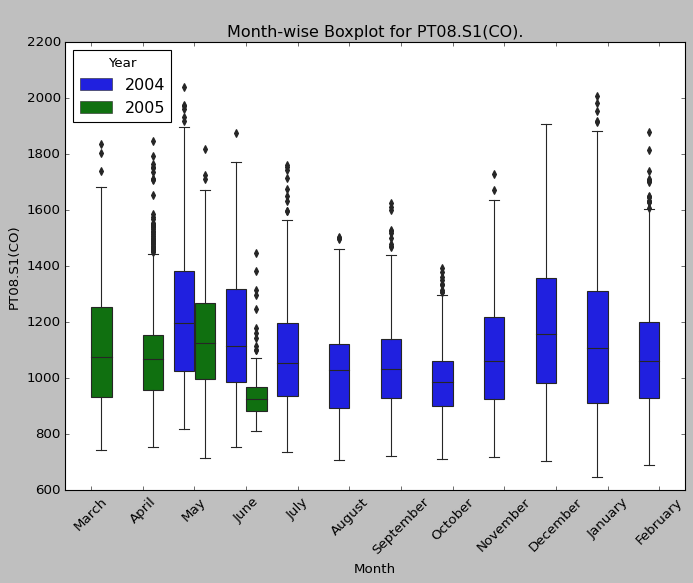

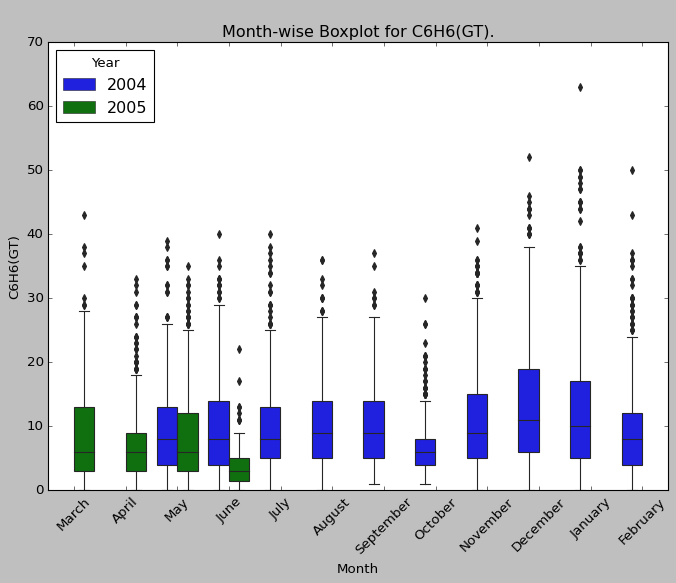

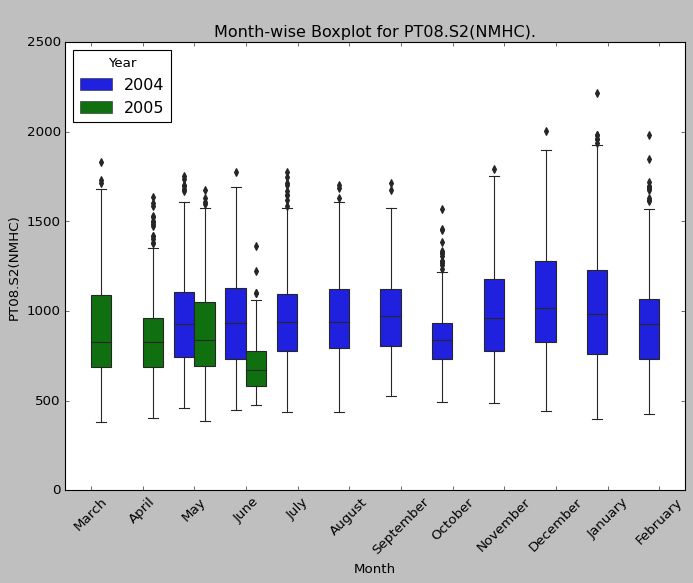

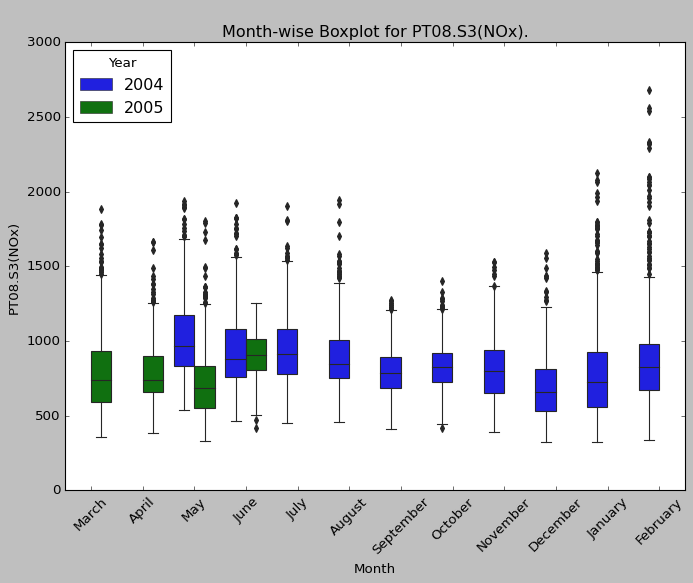

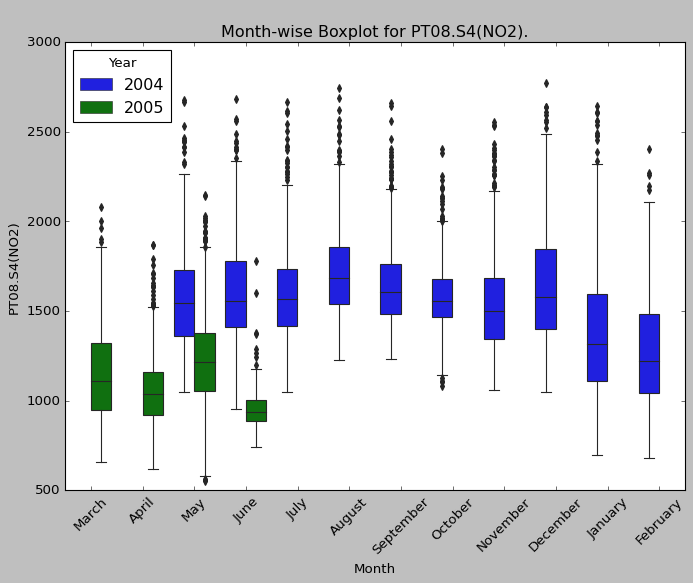

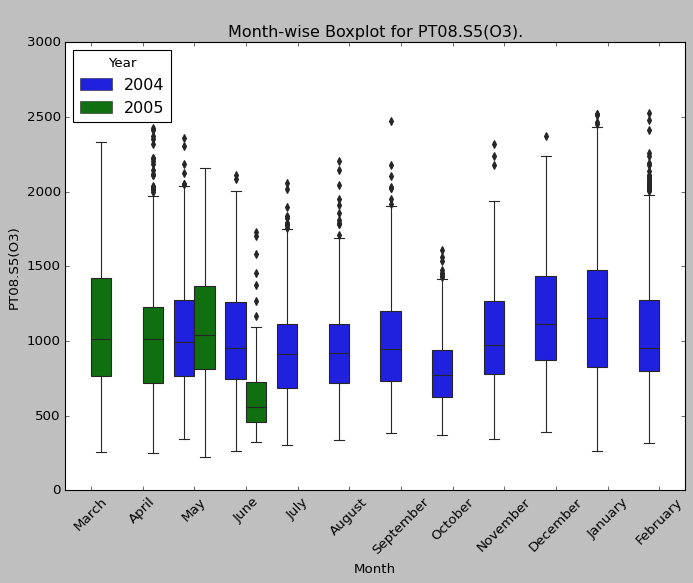

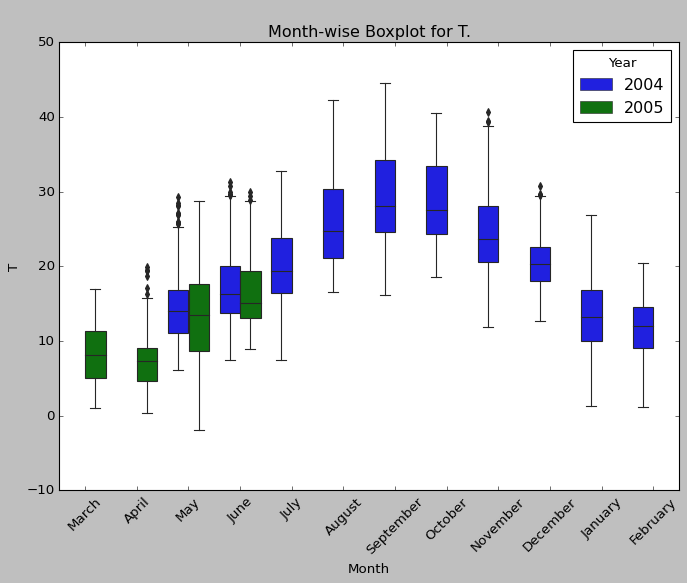

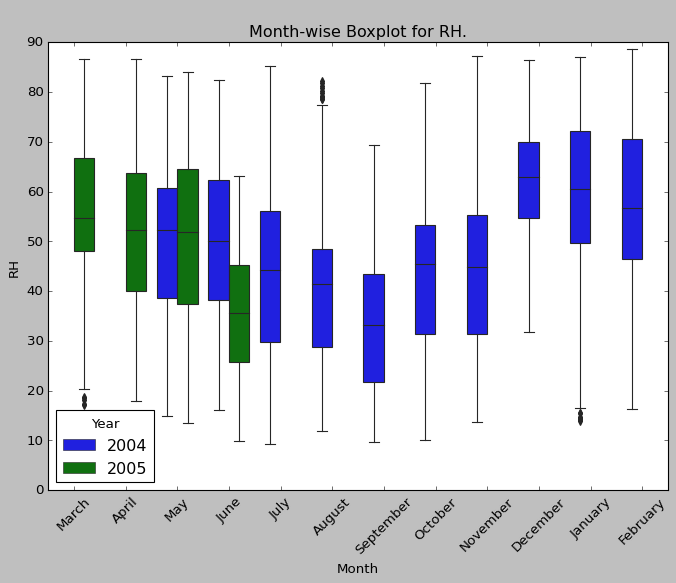

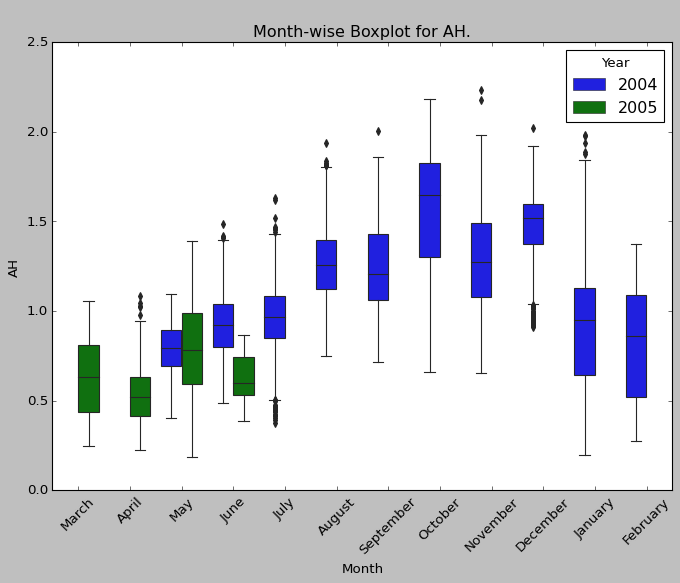

In [29]:
months = df['DateTime'].dt.month_name().unique()
for col in df.columns[1:-4]:
  #plt.style.use('classic')
  plt.figure(figsize=(10, 7))
  plt.title(f"\nMonth-wise Boxplot for {col}.")
  sns.boxplot(x='Month', y=col, hue='Year', data=df)
  plt.xticks(ticks=[i for i in range(12)], labels=months, rotation=45)
  plt.show()

In [12]:
Spip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 3.2 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=a691d49aaa5f329fce1abc8c8c75fda9f6a5b735844f06f3a868ae09eaa3c537
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=ef0dccd978329ae4d8497bdf67b7447c86705e6d041096aa7dbf1db677832dfa
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [13]:
from fitter import Fitter, get_common_distributions, get_distributions

In [14]:
def statisticalvalues(df):
    dict_1 = {}
    dict_1['mean'] = df.mean()
    dict_1['median'] = df.median()
    dict_1['std'] = df.std()
    dict_1['skewness'] = skew(df)
    dict_1['kurtosis'] = kurtosis(df, fisher=False)

    return dict_1

In [15]:
def plotgraph(df,x):
    ax = sns.displot(df, x=x, kde=True)
    
    return ax

In [16]:
df

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,2005,4,4,Monday
9353,2005-04-04 11:00:00,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,2005,4,4,Monday
9354,2005-04-04 12:00:00,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,2005,4,4,Monday
9355,2005-04-04 13:00:00,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,2005,4,4,Monday


In [17]:
df['PT08.S1(CO)']= df['PT08.S1(CO)'].astype(int)
df['C6H6(GT)']= df['C6H6(GT)'].astype(int)

Text(0.5, 1.0, 'Histogram')

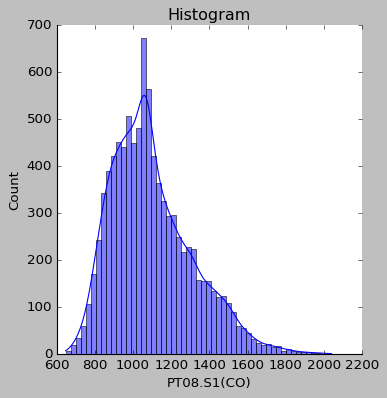

In [18]:
plotgraph(df,'PT08.S1(CO)')
plt.title("Histogram")

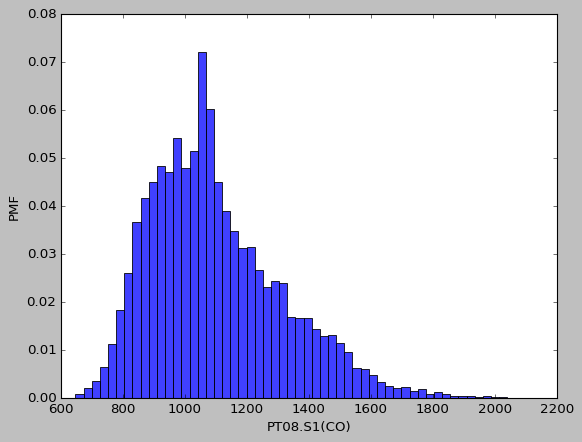

In [19]:
plt.ylabel('PMF')
sns.histplot(df['PT08.S1(CO)'], stat='probability',)

In [ ]:
statisticalvalues(df['PT08.S2(NMHC)'])

In [ ]:
distributions = ['uniform', 'expon', 'norm', 'weibull_max', 'weibull_min', 'lognorm', 'levy']
f = Fitter(df_air['PT08.S3(NOx)'].values, distributions=distributions)
f.fit()
f.summary()
print('The distribution fuction that is the most suitable for this numerical data:')
display(f.get_best(method = 'sumsquare_error'))

In [23]:
def line_plot(width, height, x_values, y_values, color, label):
  plt.figure(figsize=(width, height))
  plt.plot(x_values, y_values, color=color, label=label)
  plt.legend()
  plt.show()

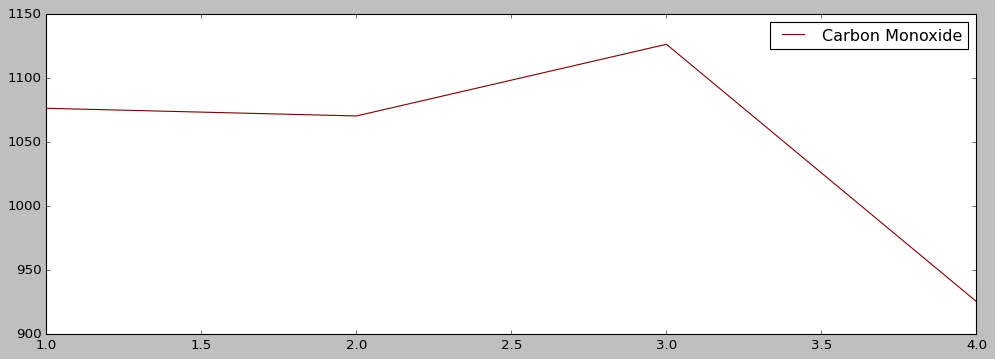

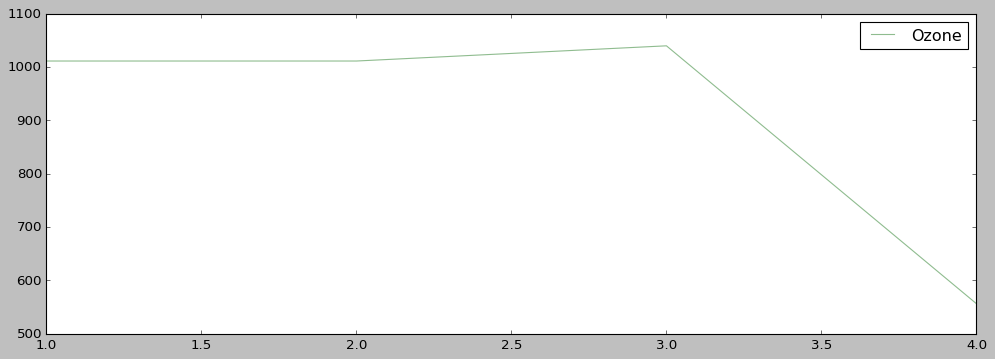

In [24]:
line_plot(15, 5, np.arange(1, 5), group_2005_month.median()['PT08.S1(CO)'],'maroon', 'Carbon Monoxide')
line_plot(15, 5, np.arange(1, 5), group_2005_month.median()['PT08.S5(O3)'],'darkseagreen', 'Ozone')

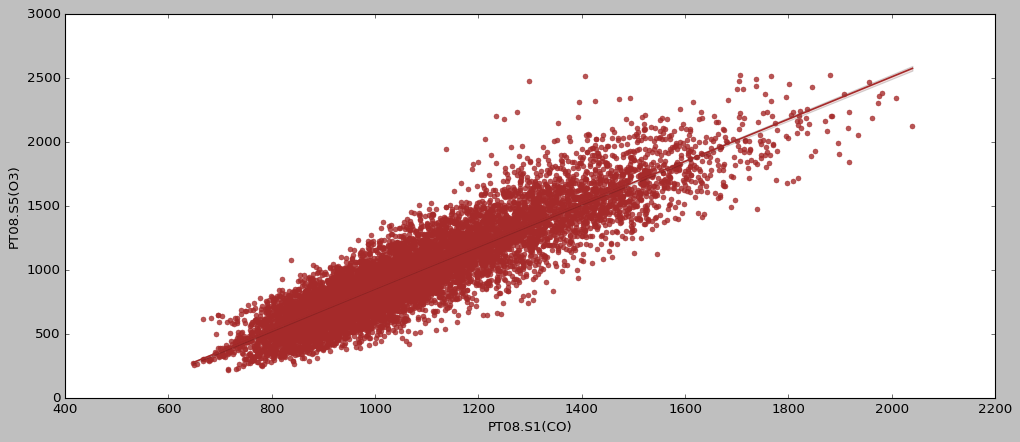

In [25]:
plt.figure(figsize=(15, 6))
sns.regplot(x='PT08.S1(CO)', y='PT08.S5(O3)', data=df, color='brown')
plt.show()

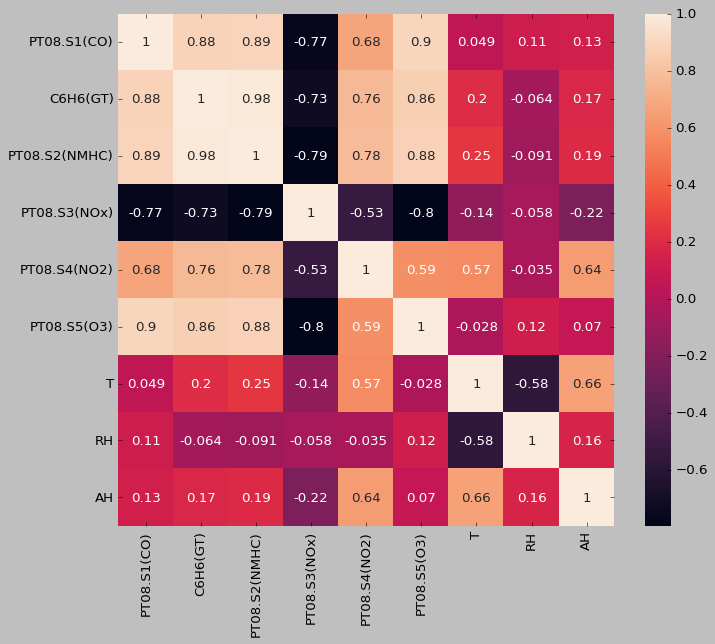

In [33]:
corr_df = df.iloc[:, 1:-4].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_df, annot=True) # 'annot=True' fills the R values in theheatmap cells.
plt.savefig('heat.png', dpi =100)
plt.show()

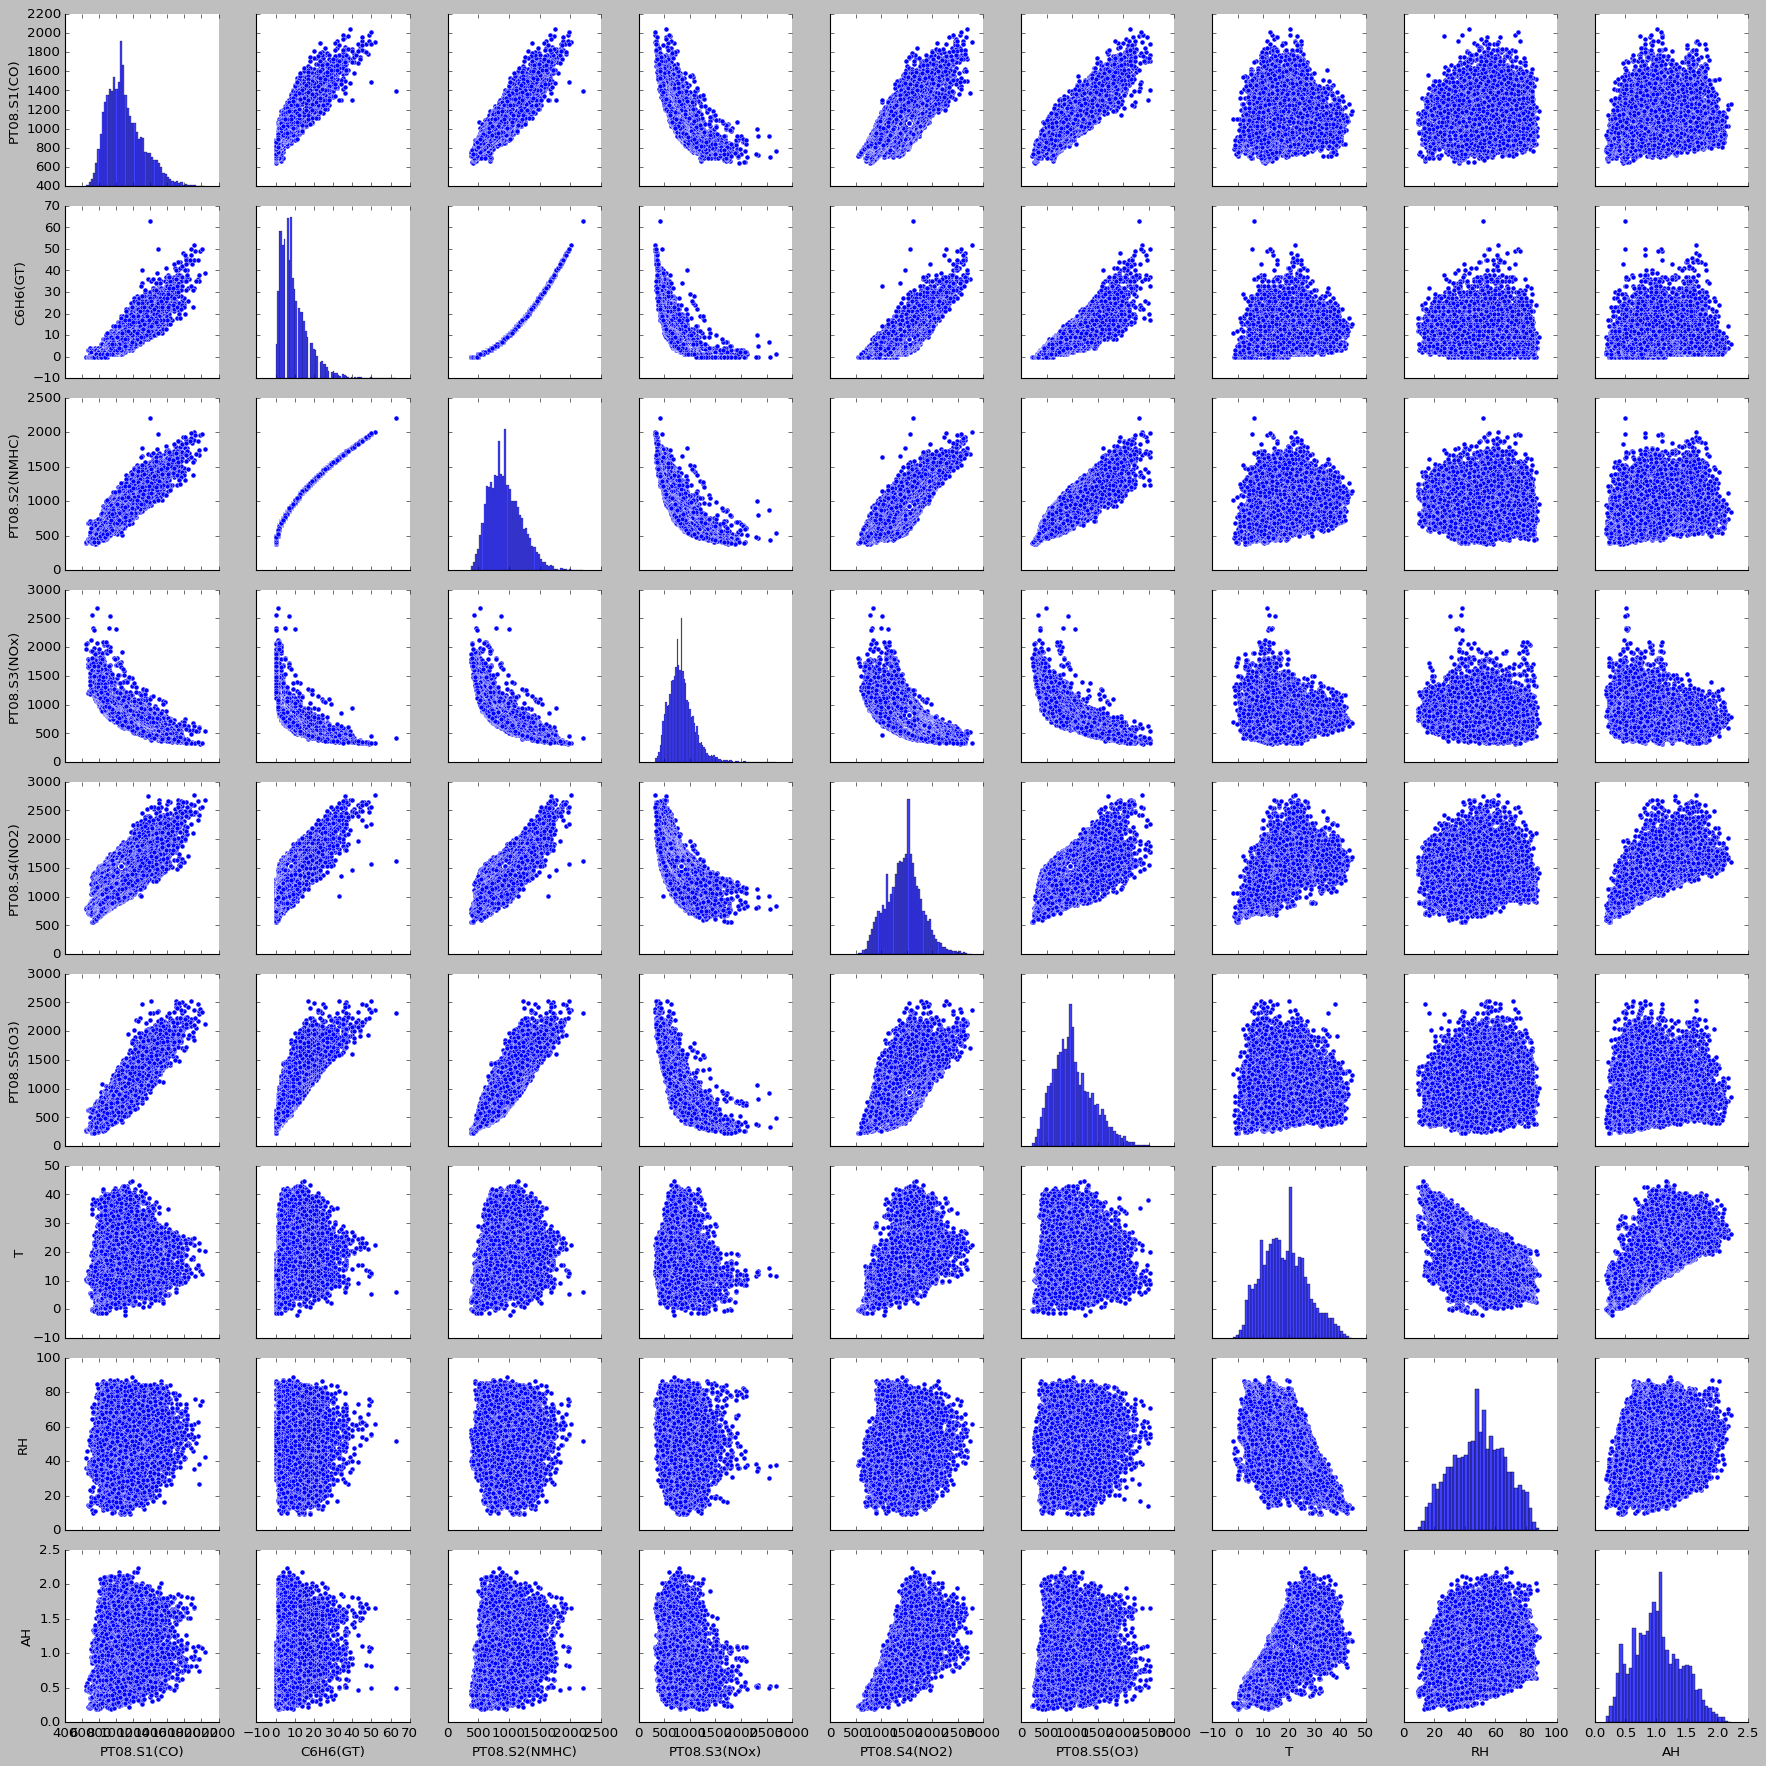

In [32]:
sns.pairplot(df.iloc[:, 1:-4])
plt.savefig('save graph as png.png', dpi =100)
plt.show()